In [ ]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv', encoding='latin-1')

data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

data.columns = ['label', 'text']

data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.isna().sum()

label    0
text     0
dtype: int64

In [ ]:
data.shape

(5572, 2)

<Axes: >

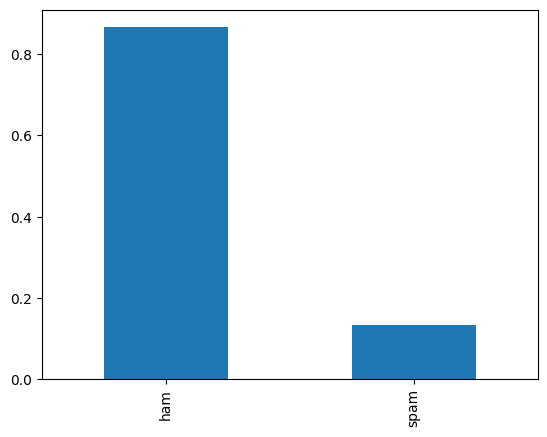

In [ ]:
data['label'].value_counts(normalize = True).plot.bar()

In [ ]:
import nltk

nltk.download('all')

# create a list text

text = list(data['text'])

# preprocessing loop

import re

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

corpus = []

for i in range(len(text)):

    r = re.sub('[^a-zA-Z]', ' ', text[i])

    r = r.lower()

    r = r.split()

    r = [word for word in r if word not in stopwords.words('english')]

    r = [lemmatizer.lemmatize(word) for word in r]

    r = ' '.join(r)

    corpus.append(r)
#assign corpus to data['text']

data['text'] = corpus

data.head()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

,label,text
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though


In [ ]:
X = data['text']

y = data['label']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

print('Training Data :', X_train.shape)

print('Testing Data : ', X_test.shape)

Training Data : (3733,)
Testing Data :  (1839,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)

X_train_cv.shape

(3733, 5698)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_cv, y_train)

# transform X_test using CV

X_test_cv = cv.transform(X_test)

# generate predictions

predictions = lr.predict(X_test_cv)

predictions

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'spam'], dtype=object)

In [ ]:
import pandas as pd

from sklearn import metrics

df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])

df

,ham,spam
ham,1600,2
spam,31,206


In [ ]:
# Baca teks dari file
def read_text_from_file(file_path):
    with open(file_path, 'r') as file:
        text = file.read()
    return text

# Melakukan preprocess
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    corpus = []
    # Memastikan `text` adalah list teks
    if not isinstance(text, list):
        text = [text]
    for i in range(len(text)):
        r = re.sub('[^a-zA-Z]', ' ', text[i])
        r = r.lower()
        r = r.split()
        r = [word for word in r if word not in stopwords.words('english')]
        r = [lemmatizer.lemmatize(word) for word in r]
        r = ' '.join(r)
        # Menambahkan teks yang telah diproses ke dalam `corpus`
        corpus.append(r)
    return corpus

# Tokenisasi dan vektorisasi teks
def tokenize_and_vectorize_text(text):
    cv = CountVectorizer()
    X_cv = cv.fit_transform(text)
    return cv, X_cv

# Membuat prediksi menggunakan model
def predict_text_class(model, cv, vectorized_text):
    predicted_class = model.predict(cv.transform(vectorized_text))
    return predicted_class

# Contoh penggunaan
file_path = 'spam.txt'
text = read_text_from_file(file_path)
preprocessed_text = preprocess_text(text)

# Tokenisasi dan vektorisasi teks untuk data latih
cv, X_train_cv = tokenize_and_vectorize_text(X_train)

# Latih model Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_cv, y_train)

# Transformasi data uji menggunakan CountVectorizer yang sama
X_test_cv = cv.transform(preprocessed_text)

# Prediksi menggunakan model yang sudah dilatih
predicted_class = predict_text_class(lr, cv, preprocessed_text)

# Tampilkan hasil prediksi
file_path = 'spam.txt'
text = read_text_from_file(file_path)

# Tampilkan teks dari file "misi.txt"
print("Teks dalam file :",text)
if predicted_class == 'spam':
    print("Teks ini diprediksi sebagai spam.")
else:
    print("Teks ini diprediksi bukan sebagai spam.")

Teks dalam file : Congratulations! You've won a free trip to Hawaii! Click the link below to claim your prize: http://freetriptohawaii.com/claim-now
Teks ini diprediksi sebagai spam.
